# Lab 4: Visualizing Data
In this lab, you will learn how to use R to visualize and explore data. Before creating analytical models, a data scientist must develop an understanding of the properties and relationships in a dataset. There are two goals for data exploration and visualization. First to understand the relationships between the data columns. Second to identify features that may be useful for predicting labels in machine learning projects. Additionally, redundant, collinear features can be identified. Thus, visualization for data exploration is an essential data science skill.
In this lab you will explore two datasets.

Your first goal is to explore a dataset that includes information about automobiles, which you want to use to create a solution that predicts the price of an automobile based on its characteristics. This type of predictive modeling, in which you attempt to predict a real numeric value, is known as regression; and it will be discussed in more detail later in the course.ÃÂ For now, the focus of this lab is on visually exploring the data to determine which features may be useful in predicting automobile prices.

After exploring the automobile data, you will turn your attention to some adult census data, which you plan to use to classify people as high or low income based information known about them. This technique of predicting whether data entities belong to one class or another is known as classification, and will be discussed later in the course. 

## Exercise 1: Visualizing Automobile Data for Regression
R includes some basic native data visualization functionality, and also supports the ggplot2 library; which provides extensive graphical capabilities. This library adds a useful language to R for defining visualizations of your data. 

### Load the Automobiles Dataset
The automobiles dataset contains details of thousands of cars, some of which may be useful in predicting the car's price. Run the code in the following cell to load the data and view the first few rows of the data frame.

In [1]:
library("AzureML")
ws = workspace()
auto.price = download.datasets(ws, "Automobile price data (Raw)")

## Coerce some character columns to numeric
cols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm')
auto.price[, cols] = lapply(auto.price[, cols], function(x) ifelse(x == '?', NA, x))
auto.price[, cols] = lapply(auto.price[, cols], as.numeric)

## remove rows with NAs 
auto.price = auto.price[complete.cases(auto.price), ]

## Add a log transformed column for price
auto.price$lnprice = log(auto.price$price)
  
## Consolidate the number of cylinders
auto.price$num.cylinders = 
    ifelse(auto.price$num.of.cylinders %in% c("four", "three"), "three-four",
        ifelse(auto.price$num.of.cylinders %in% c("five", "six"), "five-six", "eight-twelve"))
  
head(auto.price)

symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,...,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,lnprice,num.cylinders
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,9.510075,three-four
3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,9.711116,three-four
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,9.711116,five-six
2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,9.543235,three-four
2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,9.767095,five-six
2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.5,110,5500,19,25,15250,9.632335,five-six


Examine names and data types of the columns in this dataset. There are both numeric columns and character columns. In addition, you can see the first few values of each column. Character data is typically treated as categorical where each unique string value is a categorical value of the column. When exploring data sets, it is important to understand the relationships between each category and the label values.

Note: The missing values or NAs in the dataset will likely produce some warning messages when you run this code. This is normal and can be safely ignored. 

### Create a Pair-Wise Scatter Plot
First, you will apply a visualization technique known as a scatter plot matrix to the auto.price dataset. Scatter plot matrix methods are widely used to quickly produce a single overall view of the relationships in a dataset.

The scatter plot matrix allows you to examine the relationships between many variables in one view. The alternative to viewing a scatter plot matrix is an examining a large number of scatter plot combinations one at a time. This process is both tedious, and in all likelihood difficult, since you need to remember relationships you have already viewed to understand the overall structure of the data.

Run the cell below to create a scatter plot matrix of the numeric features in the dataset.

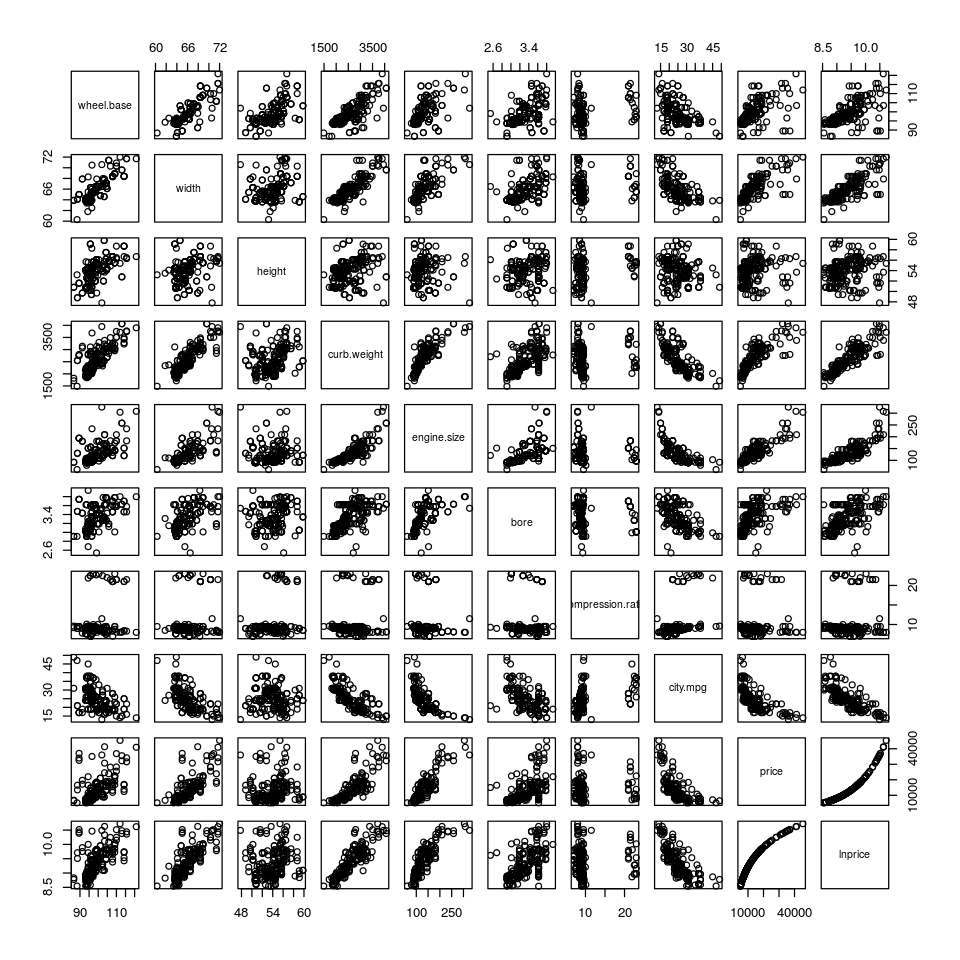

In [2]:
library(ggplot2)
library(repr)
options(repr.plot.width=8, repr.plot.height=8)

num.cols = c("wheel.base",
              "width",
              "height",
              "curb.weight",
              "engine.size",
              "bore",
              "compression.ratio",
              "city.mpg",
              "price",
              "lnprice")

pairs(~ ., data = auto.price[, num.cols])

Review the scatter ploy matrix (if the plot is too large for the cell, you can expand the cell by clicking its left margin).

Note that this plot is comprised of a number of scatter plots. For each variable there is both a row and a column. The variable is plotted on the vertical axis in the row, and on the horizontal axis in the column. In this way, every combination of cross plots for all variables is displayed in both possible orientations. Examine scatter plot matrix, which shows plots of each numeric column verses every other numeric column, and note the following:
- Not surprisingly the features, price and lnprice (log of price) are closely related. 
- Many features show significant collinearity, such as wheel.base, width and curb.weight, or curb.weight and engine.size, and city,mpg.
- A number of features show a strong relationship with the label, price, such as city.mpg, engine.size, and curb.weight.
- The feature, compression.ratio, has two distinct groupings of values, apparently corresponding to diesel (high compression ratio) and gasoline (low compression ratio) engines. These tightly grouped sets of values act very much like a categorical variable.
 
Note: The number of scatter plots and the memory required to compute and display them can be a bit daunting. You may wish to make a scatter plot matrix with fewer columns. For example, you can eliminate columns which are collinear with other columns such as highway.mpg, by using only city mpg. 

### Create Histograms
Histograms are a basic, yet powerful, tool for examining the distribution properties of a dataset. 

Note: You have already worked with histograms in a previous lab, so here you will focus on conditioned histograms of certain columns. A conditioned histogram is a histogram of a subset of data conditioned on another variable in the dataset. Often the histogram of a numeric variable is conditioned on a categorical variable. It is also possible to condition a histogram on (generally overlapping) ranges of a numeric variable. 

Run the cell below to define a function that creates histograms for a specified column, conditioned on the drive.wheel column; and then call the function for five features to see the results.

Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)



The downloaded source packages are in
	'/tmp/RtmpveyPWb/downloaded_packages'


Loading required package: grid


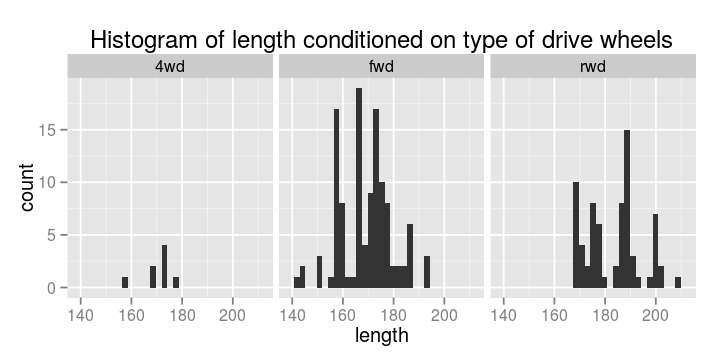

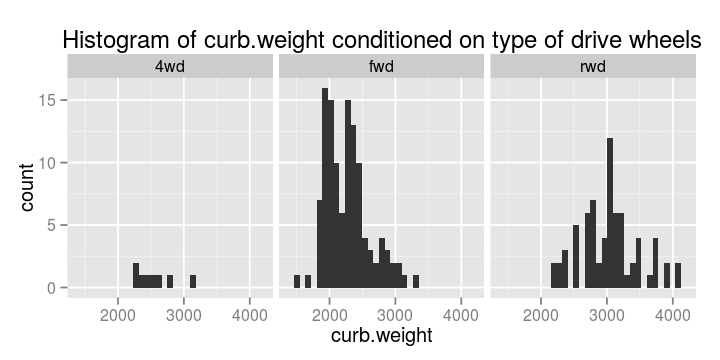

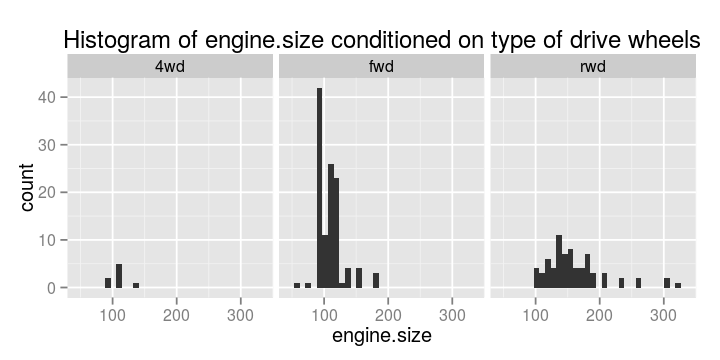

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


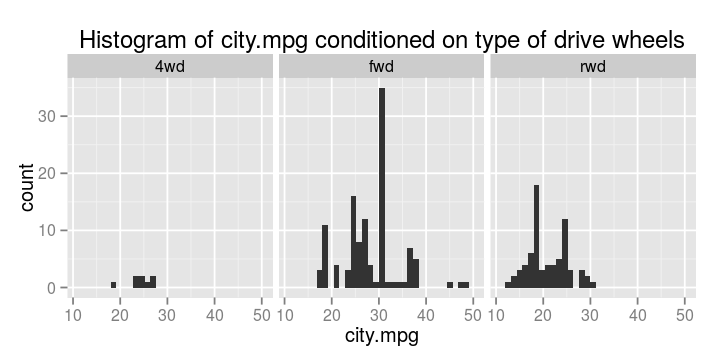

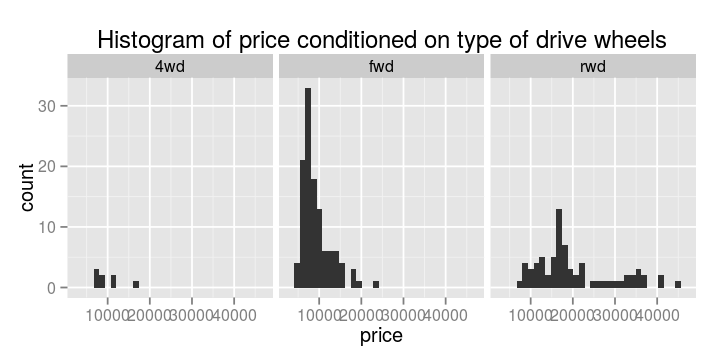

In [3]:
## Function to plot conditioned histograms
install.packages('gridExtra')
options(repr.plot.width=6, repr.plot.height=3)
auto.hist = function(x) {
  library(ggplot2)
  library(gridExtra)
  ## Compute the bin width
  rg = range(auto.price[,x])
  bw = (rg[2] - rg[1])/30
  ## Define the title
  title <- paste("Histogram of", x, "conditioned on type of drive wheels")
  ## Create the histogram
  ggplot(auto.price, aes_string(x)) +
    geom_histogram(aes(y = ..count..), binwidth = bw) +
    facet_grid(. ~ drive.wheels) +
    ggtitle(title) 
}

## Create histograms for specified features.
plot.cols2 = c("length",
               "curb.weight",
               "engine.size",
               "city.mpg",
               "price")
lapply(plot.cols2, auto.hist)


Examine this series of conditioned plots, and note the following:
- There is a consistent difference in the distributions of the numeric features conditioned on the categories of drive.wheels. 
- The distribution of the values generally increases for length and curb.weight for real wheel drive (rwd) cars, with the values for 4 wheel drive (4wd) and real wheel drive (rwd) overlapping. 
- Cars with fwd have the highest city.mpg, with 4wd and rwd in a similar range. 
- Generally, 4wd cars have the lowest price, with rwd cars having the widest range. 

Note: In a previous lab you worked with histograms conditioned on number of cylinders. In this exercise you have created histograms conditioned on the type of drive wheels. In each case, the conditioning has highlighted different aspects of the relations in these data. Exploring the distributions in the dataset conditioned on other features will likely highlight other aspects of the structure of these data. You may wish to try this on your own. 

### Create Box Plots
Box plots are another tool for comparing distributions of conditioned numeric variables. Box plots allow comparison of summary statistics, median and quartiles, as well as to visualize outliers. 

Run the cell below to define a function that creates box plots conditioned on drive.wheels, and then call the function for the same columns as the histograms above.

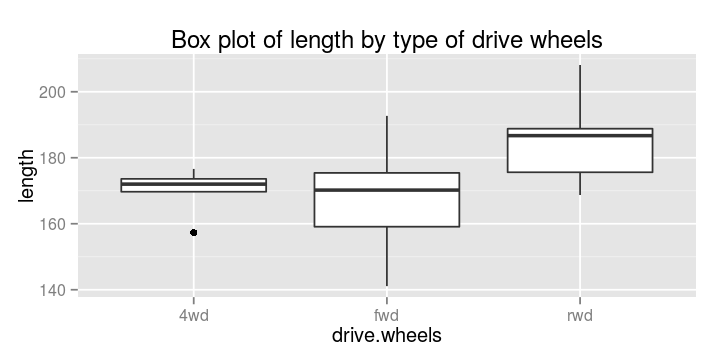

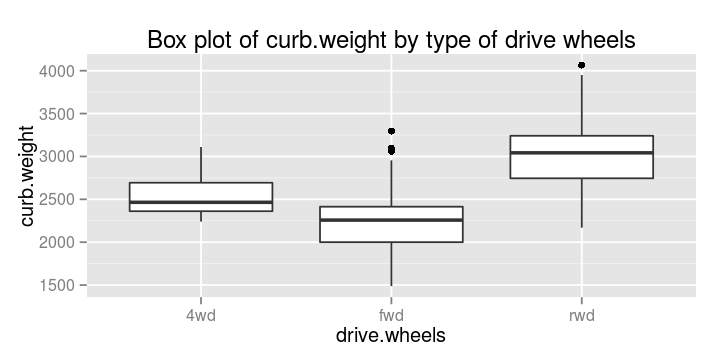

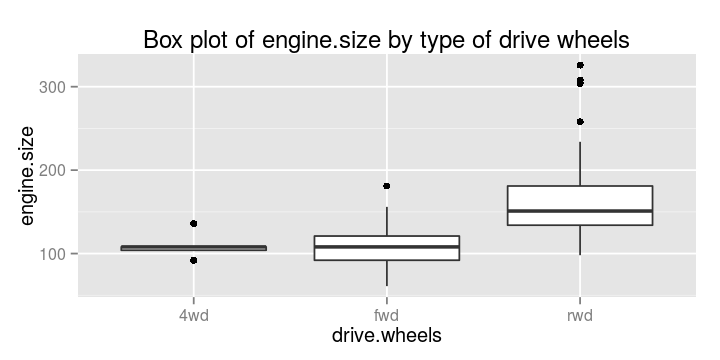

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


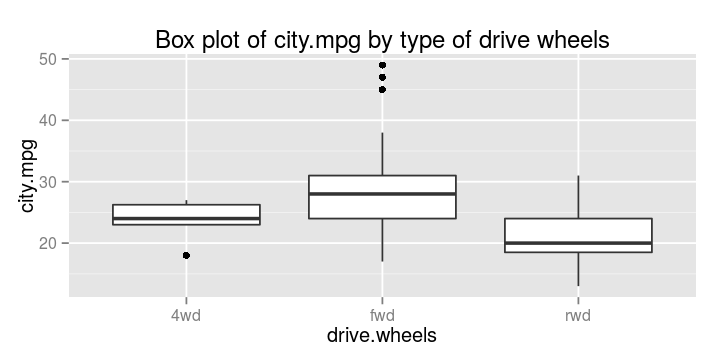

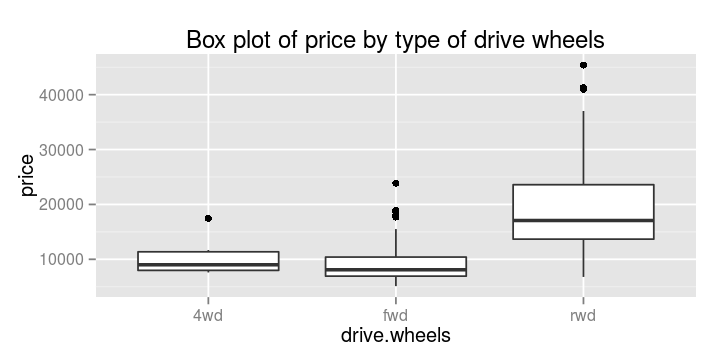

In [4]:
## Function to create conditioned box plots
auto.box = function(x) {
  title = paste("Box plot of", x, "by type of drive wheels")
  ggplot(auto.price, aes_string('drive.wheels', x)) +
    geom_boxplot() +
    ggtitle(title)
}

lapply(plot.cols2, auto.box)

Review each of the box plots. The conclusions you can draw from these plots are much the same as from the conditioned histograms. One detail now stands out; the curb.weight of 4wd cars is mostly between that of fwd and rwd cars.  As is often the case, a different view or visualization for the same data results in finding new relationships.

### Create Scatter Plots
Scatter plots are widely used to examine the relationship between two variables. In this procedure, you will explore methods to show the relationship between more than two variables on a two-dimensional scatter plot. First you will apply color as a method to examine multiple dimensions. By adding color to a scatter plot, you can effectively project three dimensions onto a two-dimensional plot. 

Run the cell below to define a function that creates scatter plots showing price vs a specified column, with color indicating the number of cylinders; and then call the function for four columns.

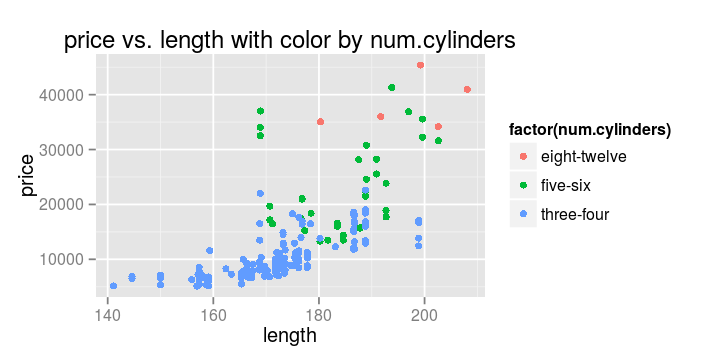

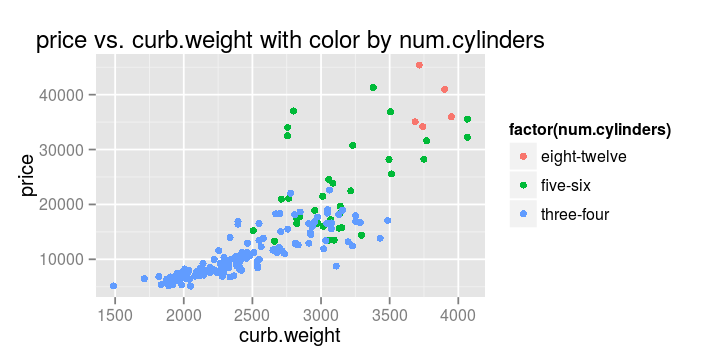

[[1]]

[[2]]

[[3]]

[[4]]


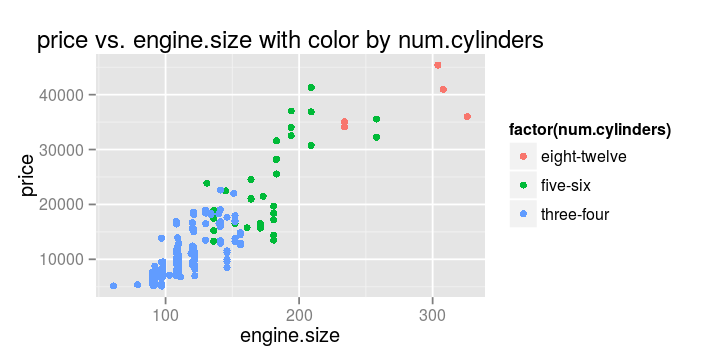

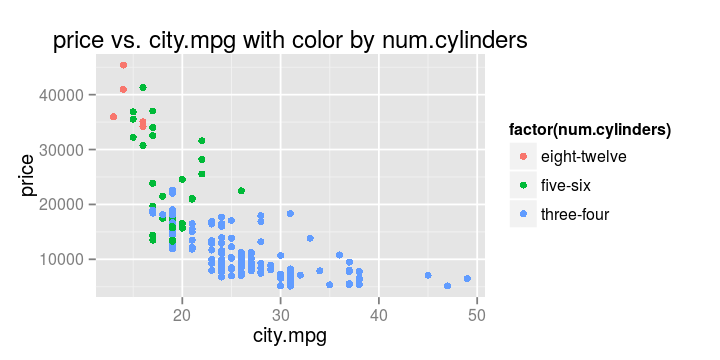

In [5]:
## Scatter plot using color to differentiate points
scatter.auto = function(x){
  require(ggplot2)
  title = paste("price vs.", x, 'with color by num.cylinders')
  ggplot(auto.price, aes_string(x, 'price')) +
    geom_point(aes(color = factor(num.cylinders))) +
    ggtitle(title)
}

## Define columns for making scatter plots
plot.cols3 = c("length",
                "curb.weight",
                "engine.size",
                "city.mpg")
lapply(plot.cols3, scatter.auto)

Examine these plots, and note the following:
- Each of the four variables plotted against price shows a strong trend, indicating they might be good predictors of price.
- In each plot, the trend and positioning of the points for by numbers of cylinders are different. Cars with different numbers of cylinders seem to form distinct but overlapping clusters. 


### Create Conditioned Scatter Plots
Next you will create and examine conditioned scatter plots. By conditioning multiple dimensions, you can project several additional dimensions onto the two-dimensional plot.
You will not use point shape as a differentiator in this exercise, but keep in mind that shape can be as useful as color. Additionally, shape may be easier for the significant fraction of the population who are color blind. 

Note: Be careful when combining methods for projecting multiple dimensions. You can easily end up with a plot that is not only hard to interpret, but even harder for you to communicate your observations to your colleagues. For example, if you use three conditioning variables, plus color and shape, you are projecting seven dimensions of your dataset. While this approach might reveal important relationships, it may just create a complex plot. 

Run the cell below to define a function that creates scatter plots of price vs a specified column, conditioned by the number of cylinders and body style

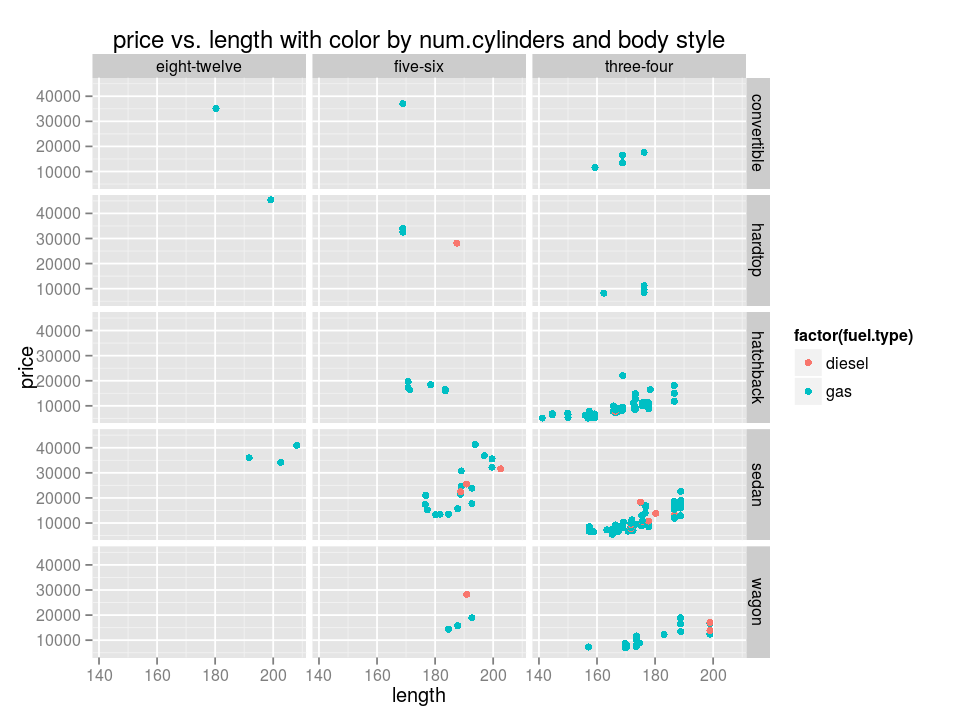

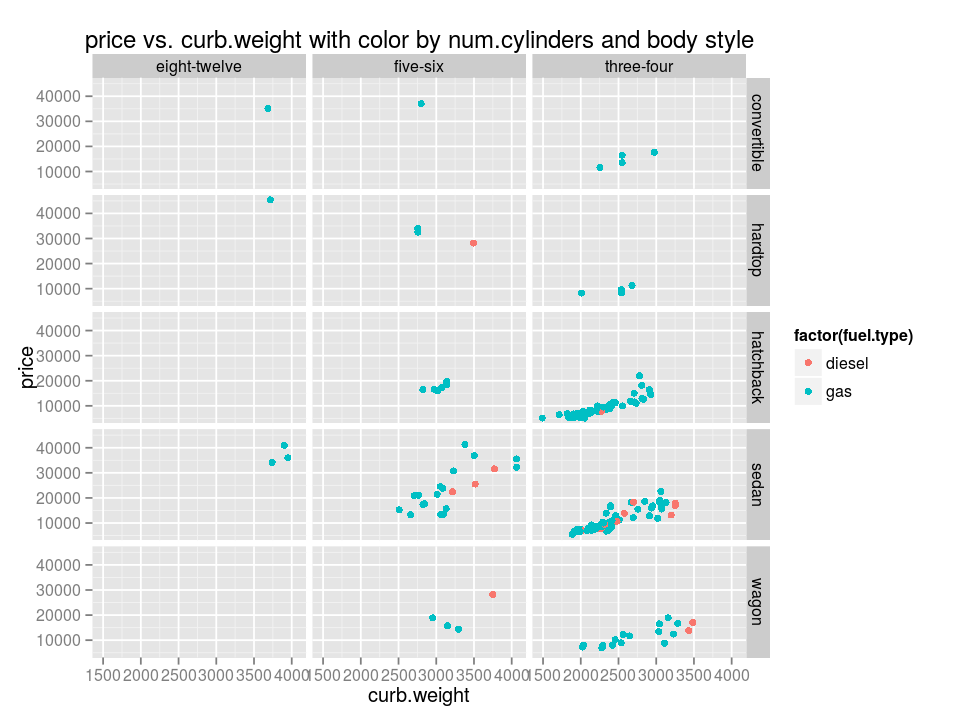

[[1]]

[[2]]

[[3]]

[[4]]


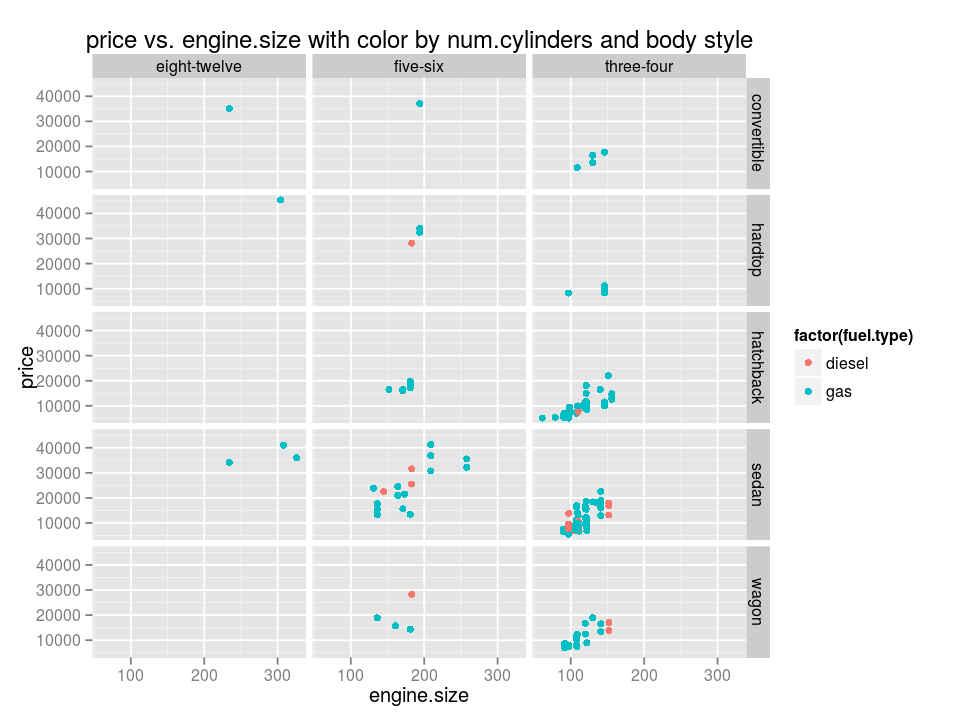

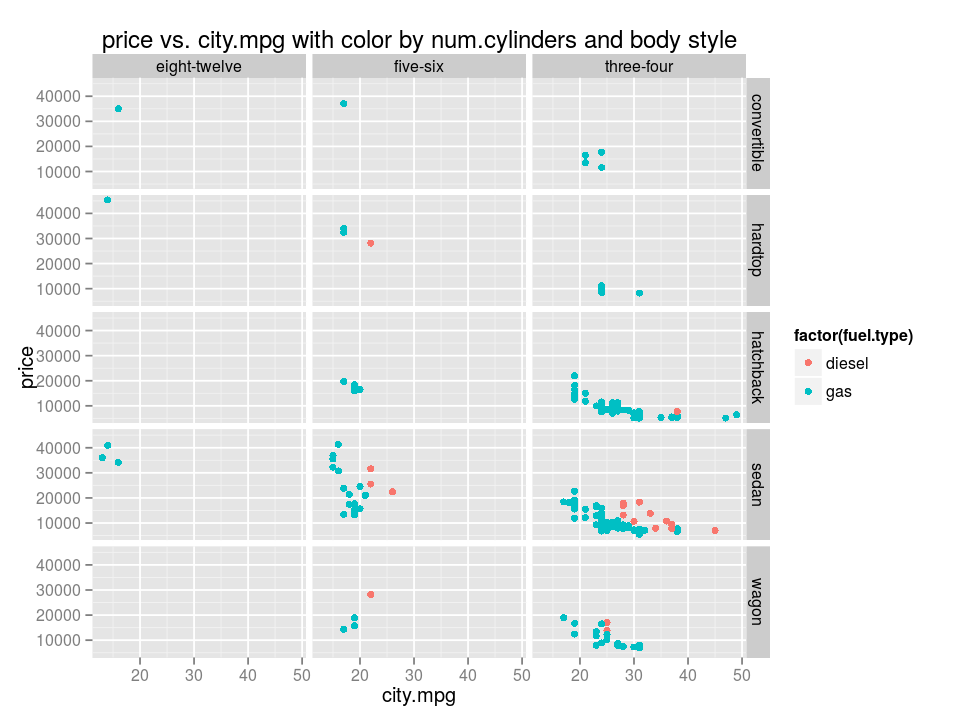

In [6]:
## Conditioned scatter plots
scatter.auto.cond = function(x){
  require(ggplot2)
  library(gridExtra)
  title = paste("price vs.", x, 'with color by num.cylinders and body style')
  ggplot(auto.price, aes_string(x, 'price')) +
    geom_point(aes(color = factor(fuel.type))) +
    facet_grid(body.style ~ num.cylinders) +
    ggtitle(title)
}

options(repr.plot.width=8, repr.plot.height=6)
lapply(plot.cols3, scatter.auto.cond)

Carefully examine the plots you have created. There is a lot of detail to understand. Generally, you should be able to conclude the following:

- There are no cars at all for some combinations of conditioning variables.
- Fuel type does not seem to be a good predictor of price in most cases, since the points for diesel cars are mostly on the same trend as gasoline cars.
- Diesel engines are generally used in heavier cars, which then tend to be more fuel efficient. 
- As observed previously, the number of cylinders has a significant impact on price.
- There is considerable overlap in price conditioned by body style, indicating body style will be a weak predictor.  

By now, you should realize that exploring a dataset in detail is an open-ended and complex task. You may wish to try other combinations of conditioning variables, and color variable, to find some other interesting relationships in these data. 


## Exercise 2:  Visualizing Adult Census Data for Classification
In this exercise, you will explore some adult census data, which you plan to use for a classification solution in which you classify people has low income if they earn 50,000 or less, or high income if they earn more than 50,000. 

### Load the Adult Census Data
Run the cell below to load the adult census data.

In [7]:
library("AzureML")
ws = workspace()
Income = download.datasets(ws, "Adult Census Income Binary Classification dataset")
str(Income)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native.countr

Note the output which is a summary of the **Income** data frame. There are both numeric columns and character columns. In addition, you can see the first few values of each column.

Note: Character data is typically treated as categorical where each unique string value is a categorical value of the column. When exploring data sets, it is important to understand the relationships between each category and the label values.

### Bar Plot the Categorical Features
Run the cell below to define a function that creates a bar plot of non-numeric features vs income, and then use the function to plot the features in the Income dataset.

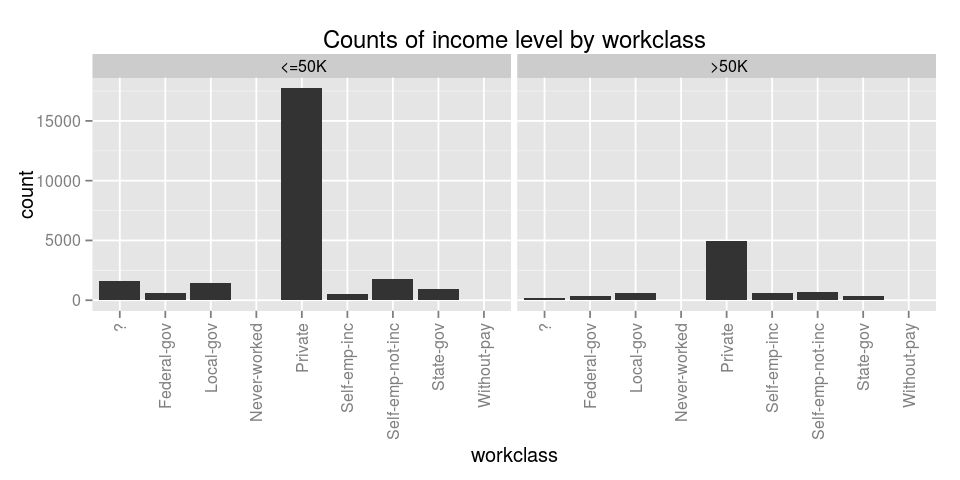

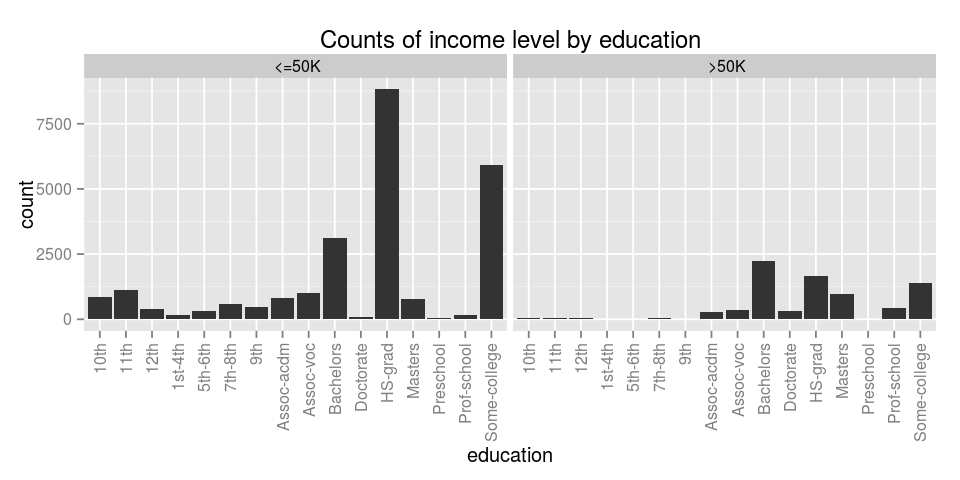

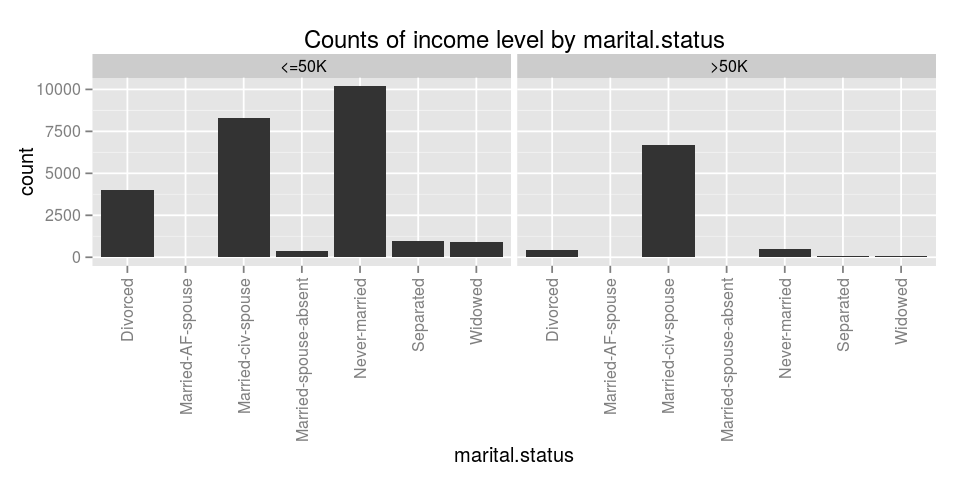

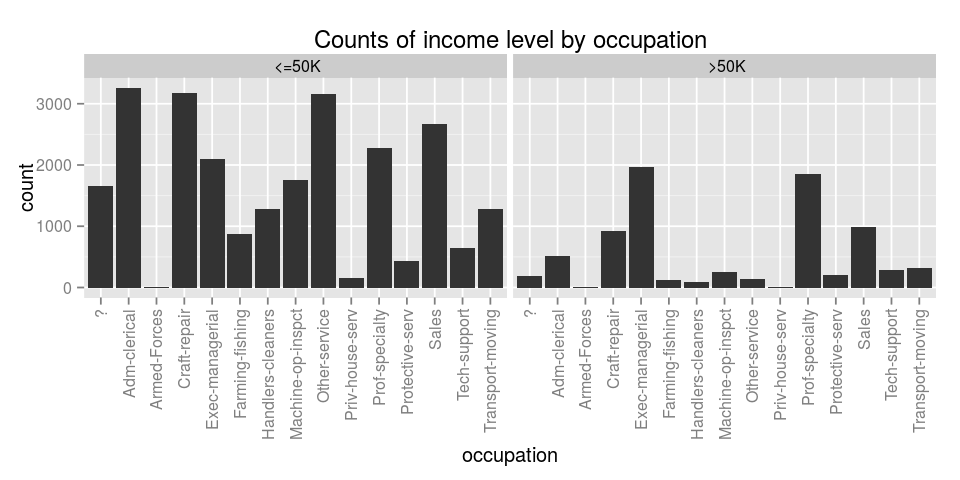

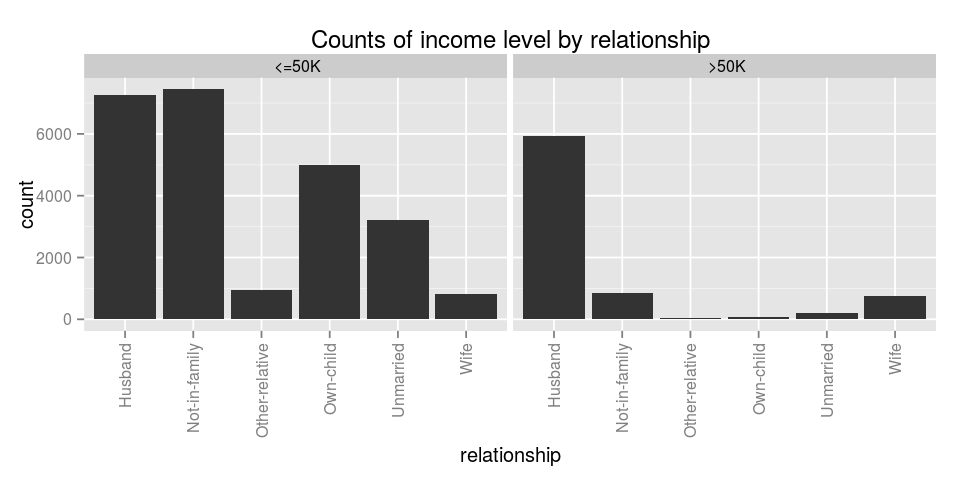

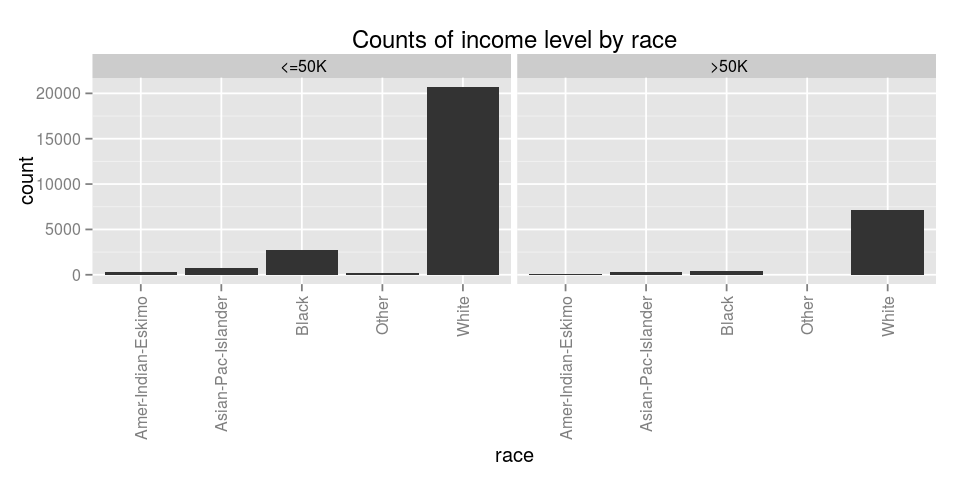

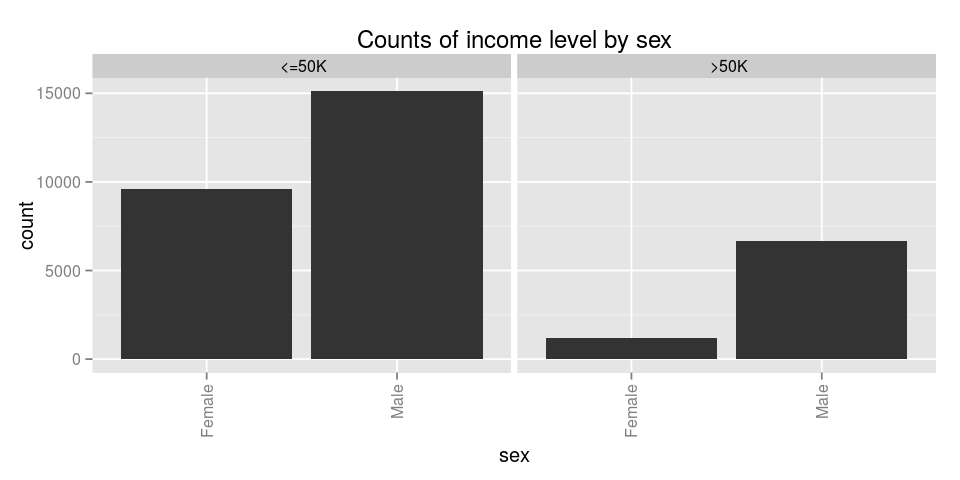

[[1]]
NULL

[[2]]
character(0)

[[3]]
NULL

[[4]]
character(0)

[[5]]
NULL

[[6]]
character(0)

[[7]]
character(0)

[[8]]
character(0)

[[9]]
character(0)

[[10]]
character(0)

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
character(0)

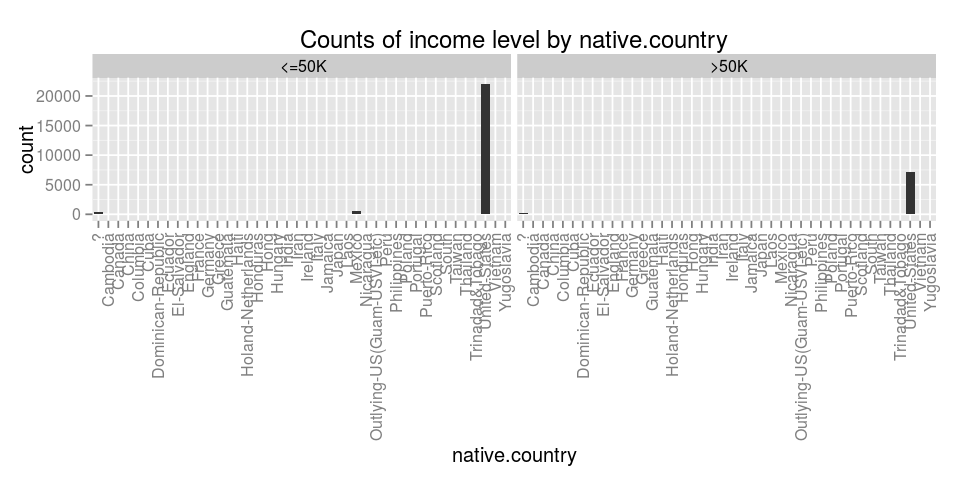

In [8]:
## Bar plot of categorical features
bar.income = function(x){
  library(ggplot2)
  if(!is.numeric(Income[,x])) {
    capture.output(
      plot( ggplot(Income, aes_string(x)) +
               geom_bar() + 
               facet_grid(. ~ income) + 
               theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5)) +
               ggtitle(paste("Counts of income level by",x))))
      }
    }

## Set up plot area
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

## Features to plot
name.list = function(x) {
  names = names(x)
  len = length(names)
  names[-len]
}

feature.names = name.list(Income)
lapply(feature.names, bar.income)

Examine the plots.

Note that marital.status may have some power in predicting the label category. The proportions of cases are quite different for people with income <=50K and people with income >50K.  Husband dominates >50K, while Not-in-family is the largest fraction for <=50K. This feature is therefore said to separate the two label categories. However, the separation is not perfect as there is overlap in the cases. This is typical and it is rare to find a single feature which provides perfect separation.

Conversely, native.country may not be that useful in predicting the label category. First, there are quite a few categories. Second, the only category with significant numbers of people is United States. There is only a small fraction of the people spread over the other 41 countries. There is no particular pattern noticeable between people with income <=50K and people with income >50K. 

Review the plots for other features. Consider if these features help to separate the label categories.
 
Note: When looking at the bar plots of the features conditioned on label value, keep in mind that there are about three times as many people with low income as high income. Therefore, it is the proportions between the categories of the label which are important, not the absolute values. In other words, are the particular values of a feature relatively more or less likely for the label categories? 

### Box Plot the Numeric Features
There are two possible categories or label values for a person's income category, in this case, <=50K or >50K. In this exercise you will create box plots for each numeric feature, conditioned on the label value. By examining these box plots, you will determine which features are likely to be useful as predictors of the label categories. 

Run the code below to define a function that creates box plots of numeric features vs income, and then call the function with income features.

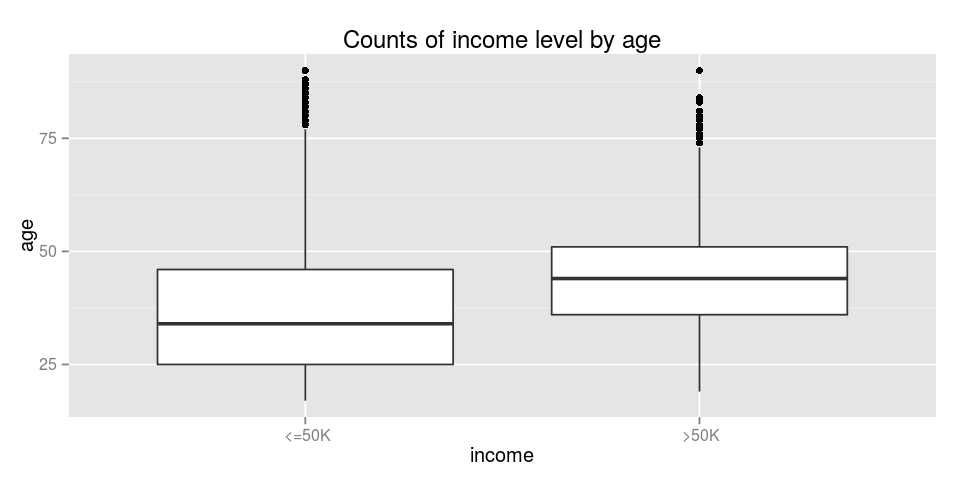

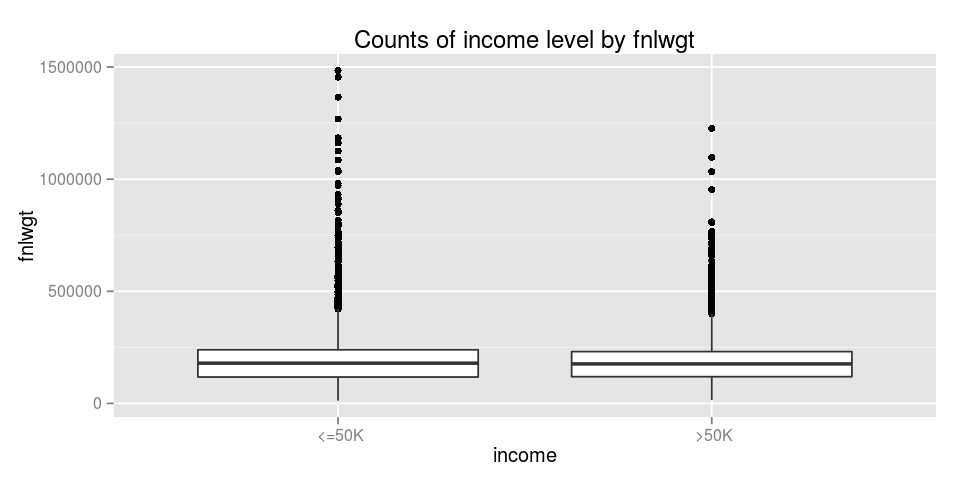

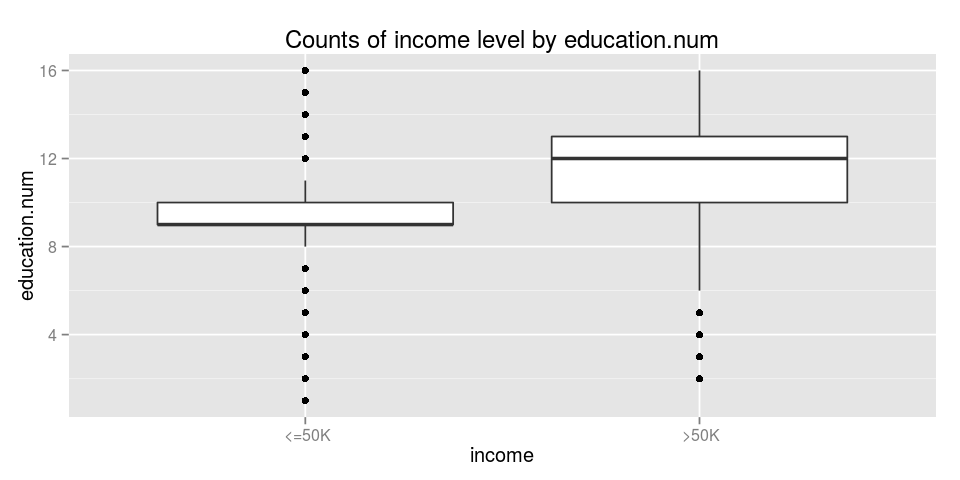

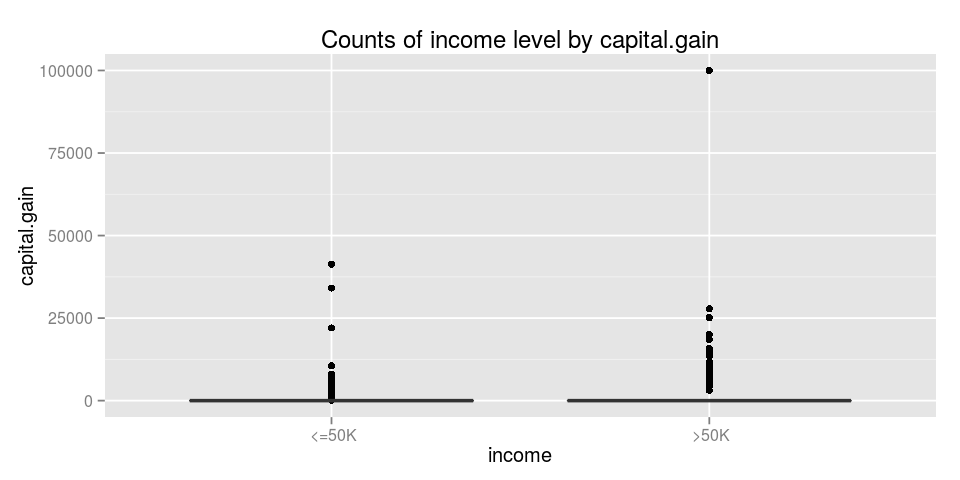

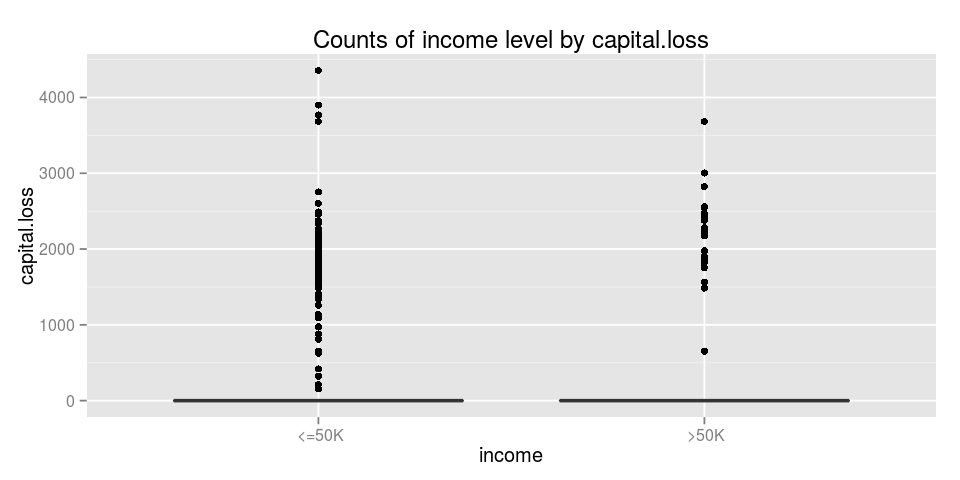

[[1]]
character(0)

[[2]]
NULL

[[3]]
character(0)

[[4]]
NULL

[[5]]
character(0)

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
character(0)

[[12]]
character(0)

[[13]]
character(0)

[[14]]
NULL

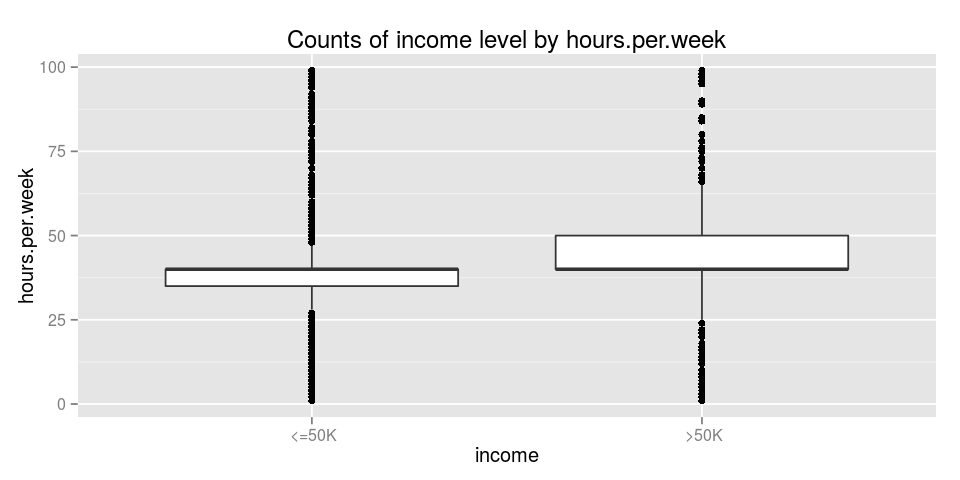

In [9]:
## Create Box plot of numeric features 
box.income = function(x){
  library(ggplot2)
  if(is.numeric(Income[,x])) {
    capture.output(
      plot( ggplot(Income, aes_string('income', x)) +
              geom_boxplot() +
              ggtitle(paste("Counts of income level by",x))))
  }}

lapply(feature.names, box.income)

Reviwe the plots.

Note that education.num may have some power in predicting the label category. People with income >50K tend to have consistently higher education.num values than people with income <=50K.

Conversely, capital.loss is not likely to be that useful in predicting the label category. Almost all people in the sample have zero (0) capital loss for both label values. Note that the quartile markers in the box plot all fall on top of each other at 0.

Review the plots for other features and consider if these features help to separate the label categories.
